# Day 1

1. re (Regular Expressions): Helps in pattern matching and text preprocessing.
2. sklearn.utils.shuffle: Randomly shuffles datasets to avoid biases in training.
3. tensorflow.keras.layers:
    1. Input: Defines input layers for neural networks.
    2. LSTM: Long Short-Term Memory layer for sequential data processing (e.g., NLP).
    3. Embedding: Converts categorical data into dense vector representations.
    4. Dense: Fully connected layer for deep learning models.
    5. Bidirectional: Wraps LSTM to process input in both forward and backward directions.
4. tensorflow.keras.models.Model: Defines and compiles deep learning models.
5. string & digits (from string module): Used for string operations, including handling punctuation and digits.

In [1]:
import pandas as pd
import numpy as np
import string
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,LSTM,Embedding,Dense,Bidirectional
from tensorflow.keras.models import Model

In [2]:
data=pd.read_csv(r'C:\Users\User\Downloads\Dataset_English_Hindi.csv\Dataset_English_Hindi.csv')

In [3]:
data.head()

,English,Hindi
0,Help!,बचाओ!
1,Jump.,उछलो.
2,Jump.,कूदो.
3,Jump.,छलांग.
4,Hello!,नमस्ते।


# Let us analyze the data!

In [4]:
data['English'].isnull().value_counts()

English
False    130474
True          2
Name: count, dtype: int64

In [5]:
data['Hindi'].isnull().value_counts()

Hindi
False    130164
True        312
Name: count, dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data=data.iloc[:2000,:]

# Preprocessing 

In [8]:
# Convert everything into LOWER case
data.English=data.English.apply(lambda x: x.lower())
data.Hindi=data.Hindi.apply(lambda x: x.lower())

# Remove Quotes
data.English=data.English.apply(lambda x: re.sub("'",'',x))
data.Hindi=data.Hindi.apply(lambda x: re.sub("'",'',x))

# Set of all special characters
exclude=set(string.punctuation)

# Remove all Special characters stored in the above set 'exclude'
data.English=data.English.apply(lambda x:''.join(ch for ch in x if ch not in exclude))
data.Hindi=data.Hindi.apply(lambda x:''.join(ch for ch in x if ch not in exclude))

#Removing Hindi punctuations explicitly
hindi_punctuation = '।॥“”‘’'
data.Hindi = data.Hindi.apply(lambda x: re.sub(f"[{hindi_punctuation}]", "", x))


# Remove all numbers from the text
remove_digits=str.maketrans('','',digits)#creates a translation table that removes all digits (0-9) from a string when used with .translate().
data.English=data.English.apply(lambda x: x.translate(remove_digits))
data.Hindi = data.Hindi.apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))

# Remove all extra spaces
data.English=data.English.apply(lambda x: x.strip())
data.Hindi=data.Hindi.apply(lambda x: x.strip())
data.English=data.English.apply(lambda x : re.sub(' +',' ',x))
data.Hindi=data.Hindi.apply(lambda x : re.sub(' +',' ',x))

data.Hindi=data.Hindi.apply(lambda x: 'START_ '+x+' _END')


Text Preprocessing Summary
1. Lowercasing – Converts all text to lowercase.
2. Remove Quotes & Special Characters – Eliminates punctuation and single quotes.
3. Remove Numbers – Deletes English digits (0-9) and specific Hindi numerals.
4. Remove Extra Spaces – Strips leading/trailing spaces and replaces multiple spaces with a single one.
5. Add Start & End Tokens (Hindi) – Wraps Hindi text with "START_+ " and " _END" for sequence modeling.

In [9]:
data.sample(5)

,English,Hindi
892,cheese is made from milk,START_ चीज़ दूध से बनता है _END
367,everyone likes him,START_ उसे सब पसंद करते हैं _END
579,please shut the door,START_ दरवाज़े को बंद कर दीजिए _END
416,she is very pretty,START_ वह बहुत सुंदर है _END
1839,i cannot understand what happened,START_ मुझे समझ में नहीं आ रहा क्या हुआ _END


The whole vocabulary of Hindi and English present in the dataset 

In [10]:
# English Vocabulary
english_vocab = set()
for sentence in data.English:
    for word in sentence.split():
        english_vocab.add(word)  # No need for the extra 'if' check

# Hindi Vocabulary
hindi_vocab = set()
for sentence in data.Hindi:
    for word in sentence.split():
        hindi_vocab.add(word)  # No need for the extra 'if' check


In [11]:
# Max Length of Source sequence
length_list=[]
for l in data.English:
    length_list.append(len(l.split(' ')))
max_length_src=np.max(length_list)

# Max Length of Target sequence
length_list=[]
for l in data.Hindi:
    length_list.append(len(l.split(' ')))
max_length_tar=np.max(length_list)


In [12]:
max_length_tar

14

In [13]:
input_words=sorted(list(english_vocab))
target_words=sorted(list(hindi_vocab))

num_encoder_tokens=len(english_vocab)
num_decoder_tokens=len(hindi_vocab)
num_encoder_tokens,num_decoder_tokens

# for 0 padding
num_decoder_tokens+=1


In [14]:
num_decoder_tokens

2058

In [15]:
input_token_index=dict([word,i+1] for i,word in enumerate(input_words))
target_token_index=dict([word,i+1] for i,word in enumerate(target_words))

reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [16]:
data_to_save={
    "input_token_index":input_token_index,
    "target_token_index":target_token_index,
    "reverse_input_char_index":reverse_input_char_index,
    "reverse_target_char_index":reverse_target_char_index,
    "num_encoder_tokens":num_encoder_tokens,
    "num_decoder_tokens":num_decoder_tokens,
    "max_length_src":max_length_src,
    "max_lenght_tar":max_length_tar
}

In [17]:
import pickle

In [18]:
# Save to a pickle file
with open("variables.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

print("Variables saved successfully!")

Variables saved successfully!


In [19]:
# for i in ['hello','i','am','learning','translation']:
#     print(input_token_index[i])
    

In [20]:
data=shuffle(data)
data.head()

,English,Hindi
1438,when did the accident happen,START_ हादसा कब हुआ _END
1115,were here to protect you,START_ हम आपकी रक्षा करने के लिए यहाँ आए हैं _END
371,he cried and cried,START_ वह रोया और और रोया _END
999,a is times as long as b,START_ a b से पाँचगुना लम्बा है _END
1903,you had better not read this book,START_ तुम यह किताब न ही पढ़ो बेहतर होगा _END


# Preprocessing complete

In [21]:
import pickle

In [22]:
# Save as pickle
with open("preprocessed_data.pkl", "wb") as f:
    pickle.dump(data, f)

# Day 2

In [23]:
import pandas as pd
import numpy as np
import string
import tensorflow as tf
from string import digits
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,LSTM,Embedding,Dense,Bidirectional
from tensorflow.keras.models import Model

We are going to load the preprocessed data stored as pickle file.

In [24]:
import pickle


# Load it back
with open("preprocessed_data.pkl", "rb") as f:
    data = pickle.load(f)

data.head()


,English,Hindi
1438,when did the accident happen,START_ हादसा कब हुआ _END
1115,were here to protect you,START_ हम आपकी रक्षा करने के लिए यहाँ आए हैं _END
371,he cried and cried,START_ वह रोया और और रोया _END
999,a is times as long as b,START_ a b से पाँचगुना लम्बा है _END
1903,you had better not read this book,START_ तुम यह किताब न ही पढ़ो बेहतर होगा _END


In [25]:
# Load the data from the pickle file
with open("variables.pkl", "rb") as f:
    loaded_data = pickle.load(f)

# Extract variables
input_token_index = loaded_data["input_token_index"]
target_token_index = loaded_data["target_token_index"]
reverse_input_char_index = loaded_data["reverse_input_char_index"]
reverse_target_char_index = loaded_data["reverse_target_char_index"]
num_encoder_tokens = loaded_data["num_encoder_tokens"]
num_decoder_tokens = loaded_data["num_decoder_tokens"]
max_length_src = loaded_data["max_length_src"]
max_length_tar = loaded_data["max_lenght_tar"]  # Ensure correct spelling

# Print loaded data (Optional)
print("Loaded Variables:")
print(f"num_encoder_tokens: {num_encoder_tokens}")
print(f"num_decoder_tokens: {num_decoder_tokens}")
print(f"max_length_src: {max_length_src}")
print(f"max_length_tar: {max_length_tar}")

Loaded Variables:
num_encoder_tokens: 1671
num_decoder_tokens: 2058
max_length_src: 9
max_length_tar: 14


In [26]:
data['inp_len']=data.English.apply(lambda x:len(x.split()))
data['tar_len']=data.Hindi.apply(lambda x:len(x.split()))

In [27]:
data.sample(5)

,English,Hindi,inp_len,tar_len
1966,its more difficult than you think,START_ जितना तुम सोच रहे हो उतना आसान नहीं है ...,6,11
541,i am a stranger here,START_ मुझे यहाँ पर अजनबी के जैसा महसूस होता ह...,5,11
153,he was hard up,START_ उसको पैसों की कमी थी _END,4,7
665,please throw the ball,START_ गेंद फेंकिए _END,4,4
1200,there is a bag on the desk,START_ मेज़ पर बस्ता रखा हुआ है _END,7,8


In [28]:
X,y=data.English,data.Hindi
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((1400,), (600,))

In [29]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [30]:
import pickle


# Load it back
with open("X_train.pkl", "rb") as f:
    X_train = pickle.load(f)
with open("X_test.pkl", "rb") as f:
    X_test = pickle.load(f)


In [31]:
def generate_batch(X, y, batch_size):
    while True:
        for j in range(0, len(X), batch_size):
            current_batch_size = min(batch_size, len(X) - j)
            
            encoder_input_data = np.zeros((current_batch_size, max_length_src), dtype='float32')
            decoder_input_data = np.zeros((current_batch_size, max_length_tar), dtype='float32')
            decoder_target_data = np.zeros((current_batch_size, max_length_tar, num_decoder_tokens), dtype='float32')

            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                input_words = input_text.split()
                target_words = target_text.split()
                
                # Fill encoder_input_data
                for t, word in enumerate(input_words):
                    encoder_input_data[i, t] = input_token_index.get(word, 0)  # Handle unknown words
                
                # Fill decoder_input_data and decoder_target_data
                for t, word in enumerate(target_words):
                    decoder_input_data[i, t] = target_token_index.get(word, 0)
                    if t > 0:
                        decoder_target_data[i, t - 1, target_token_index.get(word, 0)] = 1.0  # One-hot

            # print(f"Batch generated: encoder_input_data shape: {encoder_input_data.shape}, "
            #       f"decoder_input_data shape: {decoder_input_data.shape}, "
            #       f"decoder_target_data shape: {decoder_target_data.shape}")

            yield ([encoder_input_data, decoder_input_data], decoder_target_data)


This function, generate_batch(), is a generator that yields batches of data for training a sequence-to-sequence (Seq2Seq) model. It processes input (X) and target (y) sequences, converting them into numerical representations for an encoder-decoder architecture.

Key Steps:
1. Iterates through X and y in batches of size batch_size.
2.Initializes three NumPy arrays for:
    1. encoder_input_data (encoder input sequences)
    2. decoder_input_data (decoder input sequences)
    3. decoder_target_data (decoder target sequences, one-hot encoded).
3. Converts words into indices using input_token_index and target_token_index.
4. Uses one-hot encoding for decoder_target_data.
5. Yields data in the format ([encoder_input_data, decoder_input_data], decoder_target_data), which is used for training the model.

In [32]:
latent_dim=100 
'''Initially, I tried with 20, it gave me accuracy upto 13.53 , then I tried 100 which gives me a max accuracy of 85.
    There is a scope of improvement! May be if it was 150 or 200, we can expect some improvement'''

'Initially, I tried with 20, it gave me accuracy upto 13.53 , then I tried 100 which gives me a max accuracy of 85.\n    There is a scope of improvement! May be if it was 150 or 200, we can expect some improvement'

In [33]:
from keras.layers import Concatenate


In [34]:
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(input_dim=num_encoder_tokens+1, output_dim=latent_dim, mask_zero=True)(encoder_inputs)

# Use Bidirectional wrapper
encoder_lstm = Bidirectional(LSTM(units=latent_dim, return_state=True, return_sequences=False))
encoder_outputs, forward_h, forward_c, backward_h, backward_c = encoder_lstm(enc_emb)

# Concatenating the forward and backward states
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

# Final encoder states
encoder_states = [state_h, state_c]


# Summary of the Encoder Model
**Input Layer:

1. Accepts variable-length sequences (shape=(None,)).
2. Uses embedding (Embedding) to convert token indices into dense vectors.
3. mask_zero=True ensures padding tokens are ignored.

**Bidirectional LSTM:

1. Processes input in both forward and backward directions for better context understanding.
2. return_state=True: Outputs hidden and cell states.
3. return_sequences=False: Only final states are retained.

**State Concatenation:

1. The forward and backward LSTM states are concatenated to form:
2. state_h (concatenated hidden states).
3. state_c (concatenated cell states).

**Final Encoder States:

These concatenated states (encoder_states = [state_h, state_c]) are passed to the decoder for translation generation.

In [35]:
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding

# Decoder Inputs
decoder_inputs = Input(shape=(None,))
decoder_emb_layer = Embedding(input_dim=num_decoder_tokens, output_dim=latent_dim, mask_zero=True)
dec_emb = decoder_emb_layer(decoder_inputs)

# Adjust the LSTM units to match the new encoder state size (2 * latent_dim)
decoder_lstm = LSTM(units=2 * latent_dim, return_sequences=True, return_state=True)

# Since encoder states are now twice the size, they are passed directly
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)

# Dense layer for final output
decoder_dense = Dense(units=num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the full translator model
translator = Model([encoder_inputs, decoder_inputs], decoder_outputs)


# Summary of the Decoder Model
** Decoder Inputs:

1. Accepts variable-length sequences (shape=(None,)).
2. Uses an embedding layer (Embedding) to convert token indices into dense vectors.
3. mask_zero=True ensures padding tokens are ignored.

** LSTM Layer (Decoder):

1. Uses LSTM with 2 * latent_dim units to match the encoder's concatenated state size.
2. return_sequences=True ensures an output at every time step.
3. return_state=True (though not used here, it's useful for inference).
4. Takes encoder states (encoder_states) as initial states.

** Dense Output Layer:

Fully connected Dense layer with softmax activation to generate probabilities over num_decoder_tokens.

** Final Model:

1. Inputs: [encoder_inputs, decoder_inputs]
2. Outputs: decoder_outputs (predicted token probabilities).

**Purpose: Translates input sequences to target sequences using sequence-to-sequence learning. 

In [36]:
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001)

In [37]:
translator.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'],run_eagerly=True
             )
# steps_per_execution=10

In [38]:
translator.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 100)    167200      ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 bidirectional (Bidirectional)  [(None, 200),        160800      ['embedding[0][0]']              
                                 (None, 100),                                                 

In [39]:
train_samples=len(X_train)
val_samples=len(X_test)
batch_size=64
epochs=20
steps_per_epoch=train_samples//batch_size,
validation_steps=val_samples//batch_size

In [40]:
 translator.fit(
    generate_batch(X_train, y_train, batch_size),
    steps_per_epoch=train_samples//batch_size,
    epochs=250,
    validation_data=generate_batch(X_test, y_test, batch_size),
    validation_steps=val_samples//batch_size   
 )

Epoch 1/250
21/21 [==============================] - 8s 382ms/step - loss: 3.0915 - accuracy: 0.1226 - val_loss: 2.7625 - val_accuracy: 0.1303
Epoch 2/250
21/21 [==============================] - 8s 405ms/step - loss: 2.6984 - accuracy: 0.1310 - val_loss: 2.7093 - val_accuracy: 0.1412
Epoch 3/250
21/21 [==============================] - 8s 409ms/step - loss: 2.6046 - accuracy: 0.1430 - val_loss: 2.6825 - val_accuracy: 0.1460
Epoch 4/250
21/21 [==============================] - 9s 423ms/step - loss: 2.5448 - accuracy: 0.1460 - val_loss: 2.6699 - val_accuracy: 0.1521
Epoch 5/250
21/21 [==============================] - 8s 394ms/step - loss: 2.4848 - accuracy: 0.1521 - val_loss: 2.6725 - val_accuracy: 0.1518
Epoch 6/250
21/21 [==============================] - 8s 373ms/step - loss: 2.4467 - accuracy: 0.1553 - val_loss: 2.6767 - val_accuracy: 0.1557
Epoch 7/250
21/21 [==============================] - 8s 383ms/step - loss: 2.3948 - accuracy: 0.1583 - val_loss: 2.6855 - val_accuracy: 0.1598

### **Summary of Model Training Process**  

1. **Training Data Generator:**  
   - Uses `generate_batch(X_train, y_train, batch_size)` to feed data in batches dynamically.  
   - Helps manage memory efficiently instead of loading the entire dataset at once.  

2. **Steps Per Epoch:**  
   - Defined as `train_samples // batch_size`, ensuring the model sees the entire dataset in one epoch.  

3. **Epochs:**  
   - The model trains for **250 epochs** to allow sufficient learning.  

4. **Validation Data:**  
   - Uses `generate_batch(X_test, y_test, batch_size)` to evaluate performance on unseen data.  
   - `validation_steps = val_samples // batch_size` ensures proper validation dataset coverage.  

5. **Purpose:**  
   - This setup trains the **sequence-to-sequence model** for language translation using **batch-based training** with **real-time data generation**, making it efficient and scalable. 

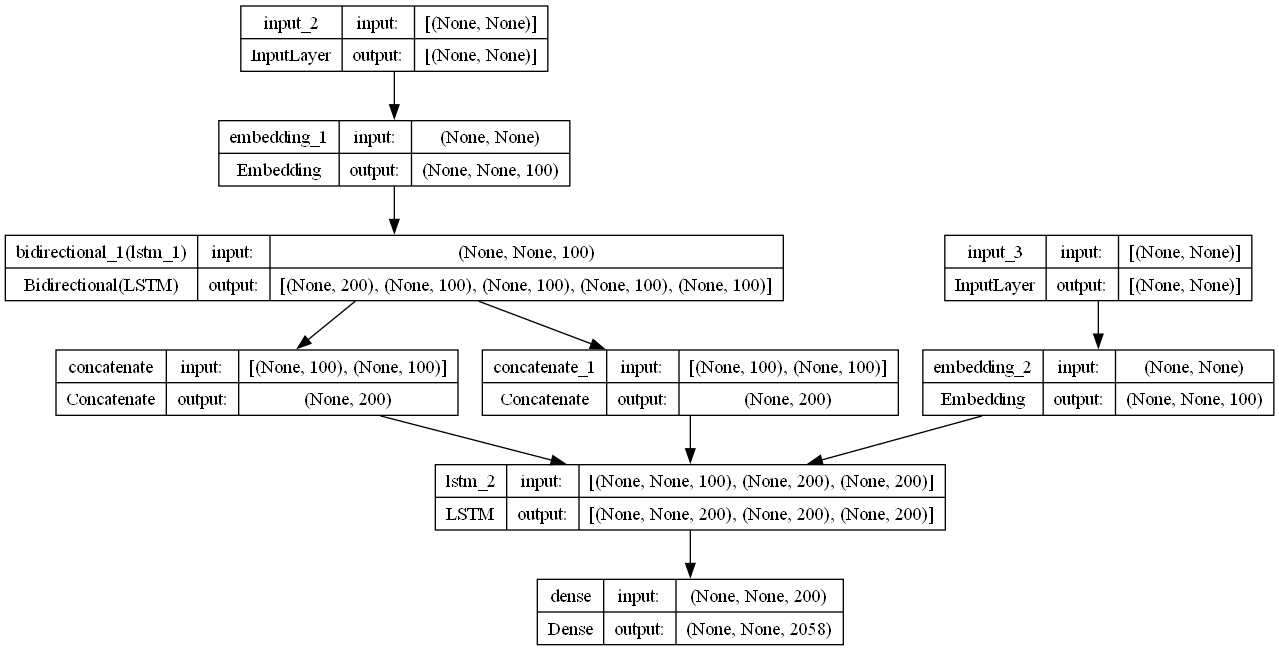

In [ ]:
from keras.utils import plot_model
plot_model(translator,show_shapes=True)

# The Model's architecture

In [ ]:
#translator.save_weights('translator_weights.h5')
'''Saving the weights of the trained model'''

'Saving the weights of the trained model'

In [ ]:
translator.load_weights('translator_weights.h5')

In [ ]:
#Encode the input sequence to get the "Context vectors"
encoder_model=Model(encoder_inputs, encoder_states)

# Adjust decoder state inputs to match bidirectional encoder
decoder_state_input_h = Input(shape=(2 * latent_dim,))
decoder_state_input_c = Input(shape=(2 * latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2 = decoder_emb_layer(decoder_inputs)  # Decoder embeddings

# Decoder LSTM should also have 2 * latent_dim units
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, 
                                                     initial_state=decoder_states_inputs)

decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2)  # Softmax layer for word prediction

# Final Inference Decoder Model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,  # Inputs: target word + previous states
    [decoder_outputs2] + decoder_states2  # Outputs: predicted word + updated states
)


### **Summary of Inference Model (Encoder & Decoder for Translation)**  

1. **Encoder Model:**  
   - Encodes the input sequence into **context vectors (hidden & cell states)**.  
   - Used during inference to extract representations of the input sentence.  

2. **Decoder Model:**  
   - Takes previous word inputs and the encoded **context vectors** to generate translations step by step.  
   - Uses **Bidirectional LSTM**, requiring states of size **`2 * latent_dim`**.  

3. **Workflow:**  
   - **Encoder:** Processes input & generates hidden states.  
   - **Decoder:** Takes word embeddings and hidden states to predict the next word.  
   - The model is **auto-regressive**, meaning the decoder generates words sequentially.  

4. **Purpose:**  
   - This setup enables **real-time translation** by generating target words **one at a time**, conditioned on previous predictions. 

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_token_index['START_']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # Make sure we're not using previous predictions' states
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' ' + sampled_char

        # Exit condition: find stop character
        if sampled_char == '_END':
            stop_condition = True

        # Reset target_seq for next step
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        # Reset states for the next time step
        states_value = [h, c]  # **Ensure correct state transfer**
    
    return decoded_sentence.strip()  # Remove extra spaces


### **Summary of `decode_sequence` Function**  

1. **Purpose:**  
   - Generates a translated sentence **one word at a time** using the trained encoder-decoder model.  

2. **Process:**  
   - **Encoding:** The input sequence is encoded into **context vectors (hidden & cell states)** using the encoder model.  
   - **Decoding (Step-by-Step Prediction):**  
     - Starts with a **target sequence** containing the special token `'START_'`.  
     - Predicts the next word using the **decoder model**.  
     - Updates the target sequence with the predicted word.  
     - Continues until the special token `'_END'` is generated.  

3. **Key Components:**  
   - Uses **`np.argmax`** to pick the most probable word at each step.  
   - **Ensures state transfer** between decoding steps to maintain context.  
   - **Stops generation** when `'_END'` is encountered.  

4. **Outcome:**  
   - Returns the **fully translated sentence** after stripping unnecessary spaces.  
   - Enables **real-time inference** for sentence translation. 

In [ ]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [ ]:
k = 0  # Initialize k before the loop

for i in range(5):
    k += 1  # Increment k
    
    # Get input-output pair from the test generator
    (input_seq, actual_output), _ = next(train_gen)

    # Predict the translation
    decoded_sentence = decode_sequence(input_seq)

    # Extract corresponding sentences from dataset
    input_sentence = X_train.iloc[k][:]  # Use .iloc for proper indexing
    actual_translation = y_train.iloc[k][6:-4]  # Adjust slicing if necessary
    predicted_translation = decoded_sentence[:-4]  # Remove trailing `_END`

    # Print results
    print('Input English sentence:', input_sentence)
    print('Actual Hindi Translation:', actual_translation)
    print('Predicted Hindi Translation:', predicted_translation)
    print('-' * 50)


1/1 [==============================] - 0s 25ms/step
Input English sentence: this school has many students
Actual Hindi Translation:  इस स्कूल में बहुत सारे विद्यार्थी हैं 
Predicted Hindi Translation: उस गाड़ी ने बहुत धूल उड़ाई 
--------------------------------------------------
1/1 [==============================] - 0s 22ms/step
Input English sentence: they shouted for help
Actual Hindi Translation:  उन्होंने मदद के लिए चिल्लाया 
Predicted Hindi Translation: मैं तुम्हें यह करने नहीं दे सकता 
--------------------------------------------------
1/1 [==============================] - 0s 19ms/step
Input English sentence: when are you going to europe
Actual Hindi Translation:  तुम यूरोप कब जा रहे हो 
Predicted Hindi Translation: मेरी याद आई क्या 
--------------------------------------------------
1/1 [==============================] - 0s 25ms/step
Input English sentence: are you sure of her coming on time
Actual Hindi Translation:  तुम्हे पक्का मालूम है कि वह समय पर आ रही है 
Predicted Hind

Well, We aren't getting good results here! At the first go it predicted perfectly but the next time its predicting completely random sentences

In [ ]:
test_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

In [ ]:
test_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

Although, we are getting good results on the test data. Sometimes it is ompletely correct but sometimes it is not performing that well.

In [ ]:
k+=1
(input_seq, actual_output), _ = next(test_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual Hindi Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

1/1 [==============================] - 0s 41ms/step
Input English sentence: i forgot
Actual Hindi Translation:  मैं भूल गया 
Predicted Hindi Translation: मैं खुश गया 


# Final note: 
My objective of creating an English to Hindi translator using LSTMs(Bidirectional-to improve) is to learn how the machine understands our language and how well it can perform. I have gotten good grip on Encoder Decoder Model. Now I will move on and learn transformers and attention mechanisms. There is always a scope for improvement.Peace out.